In [42]:
from pylab import rand
import pylab as pl
import numpy as np

def generateData(n):
    """
    generates a 2D linearly separable dataset with 2n samples.
    returns X an array of 2D samples, and Y the samples label
    """
    xb = (rand(n) * 2 - 1) / 2 - 0.5
    yb = (rand(n) * 2 - 1) / 2 + 0.5
    xr = (rand(n) * 2 - 1) / 2 + 0.5
    yr = (rand(n) * 2 - 1) / 2 - 0.5
    inputs = []
    for i in range(n):
        inputs.append([xb[i], yb[i], -1])
        inputs.append([xr[i], yr[i], 1])
    
    data = np.array(inputs)
    X = data[:, 0:2]
    Y = data[:, -1]
    return X, Y


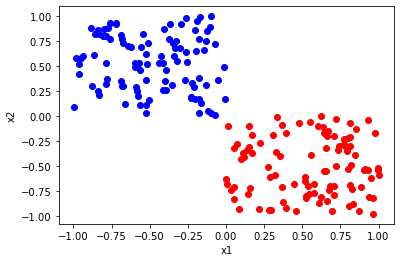

In [43]:
A, B = generateData(100)
X = A[:, 0]
Y = A[:, 1]
pl.scatter(X[B == 1], Y[B == 1], color = "red")
pl.scatter(X[B == -1], Y[B == -1], color = "blue")
pl.xlabel('x1')
pl.ylabel('x2')
pl.show()

In [44]:
# Page 26 Cours 2
def perceptron(X, Y): # x = [x1, x2, ...] <=> y; x' = [x1', x2', ...] <=> y' 
    W = np.zeros(len(X[0])) # Initialisation du vecteur des poids
    for i in range(len(X)):
        if(Y[i]*np.vdot(W, X[i]) <= 0): # Si yi<w, xi> ≤ 0, l'example est mal classé
            # Ajuster
            for j in range(len(W)):
                W[j] = W[j] + Y[i]*X[i][j] # w = w + yixi
    return W

In [45]:
w = perceptron(A, B)
print(w)

[ 0.39579331 -0.25840441]


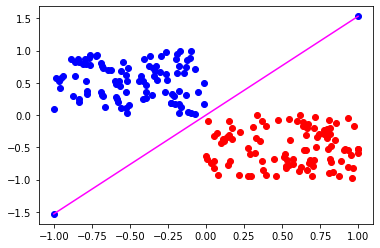

In [46]:
# Tracer
colx1 = A[:, 0]
colx2 = A[:, 1]

# Y == 1 : Tableau de True ou False
# colx1[Y == 1] : Prend les elements du meme indice que les True

pl.scatter(colx1[B == 1], colx2[B == 1], color = "red")
pl.scatter(colx1[B == -1], colx2[B == -1], color = "blue")

# Les éléments du vecteur de pondération w correspondent aux coefficients
# de la droite ax + by = 0 et vont permettre de tracer un segment séparent les
# données avec l’étiquette -1 de celles avec l’étiquette 1.
# Utilise les coefficients pour tracer l’hyperplan qui 
# sépare les données, en trouvant 2 points y1 et y2.
# ax + by = 0 => y = -a/b*x
y1 = -w[0]/w[1] * -1
y2 = -w[0]/w[1] * 1
# Je donne les x: 1, -1
pl.plot([-1, 1], [y1, y2], "ob")
pl.plot([-1, 1], [y1, y2], color="magenta")

pl.show()

In [47]:
# Calcule nbr d'erreur
def erreur(X, Y, w):
    err = 0
    for i in range(len(X)):
        if (Y[i] * np.vdot(w, X[i])) < 0: # Calculer les ptns mal classé
            err = err + 1
    return err

err = erreur(A, B, w)
print(f"Nombre d'erreur: {err}")

Nombre d'erreur: 0


w: [ 0.52844294 -0.19833651]
Nombre d'erreur: 0


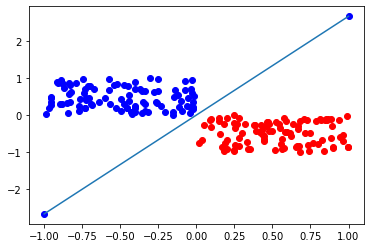

In [48]:
def testsansbiais():
    A, B = generateData(100)
    w = perceptron(A, B)
    err = erreur(A, B, w)
    y1 = -w[0]/w[1] * -1
    y2 = -w[0]/w[1] * 1
    X = A[:, 0]
    Y = A[:, 1]
    pl.scatter(X[B==1],Y[B==1],color="red")
    pl.scatter(X[B==-1],Y[B==-1],color="blue")
    pl.plot([-1, 1], [y1, y2], "ob")
    pl.plot([-1, 1], [y1, y2])
    print(f"w: {w}")
    print(f"Nombre d'erreur: {err}")
    return 
testsansbiais()

In [49]:
def generateData2(n):
    xb = (rand(n) * 2 - 1) / 2 + 0.5
    yb = (rand(n) * 2 - 1) / 2
    xr = (rand(n) * 2 - 1) / 2 + 1.5
    yr = (rand(n) * 2 - 1) / 2 - 0.5
    inputs = []
    for i in range(n):
        inputs.append([xb[i], yb[i], -1])
        inputs.append([xr[i], yr[i], 1])
    data = np.array(inputs)
    X = data[:, 0:2]
    Y = data[:, -1]
    return X, Y

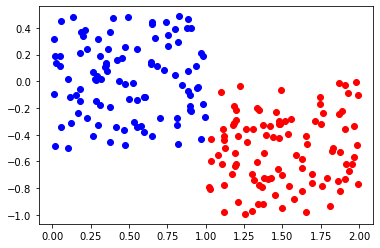

In [50]:
# Visualisation des données génerés par generateData2
A, B = generateData2(100)
X = A[:, 0]
Y = A[:, 1]
pl.scatter(X[B==1],Y[B==1],color="red")
pl.scatter(X[B==-1],Y[B==-1],color="blue")
pl.show()

In [51]:
def complete(X):
    ones = np.ones((len(X), 1))
    X2 = np.concatenate((X, ones), 1)
    return X2

W = [ 3.2071922  -1.07754112 -4.        ]
8
(x1, y1) = (0, -3.712155307770917)
(x2, y2) = (2, 2.240642464456667)


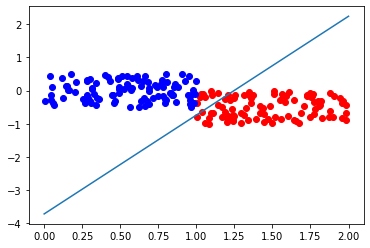

In [52]:
def testComplete():
    (A, B) = generateData2(100)
        
    colx1 = A[:, 0]
    colx2 = A[:, 1]
    
    newA = complete(A)
    
    W = perceptron(newA, B)

    # ax + by + cz = 0 => y = -a/b*x
    # la colonne de 1 qui rajoute une coordonnée à chaque exemple de
    # l’échantillon et les deux points y1, y2 sont déterminés 
    # avec la nouvelle équation de l’hyperplan.
    x1 = 0
    x2 = 2
    y1 = - (W[2]+(W[0]* x1))/W[1] 
    y2 = - (W[2]+(W[0]* x2))/W[1] 

    print(f"W = {W}")
    print(erreur(newA, B, W))
    print(f"(x1, y1) = ({x1}, {y1})" )
    print(f"(x2, y2) = ({x2}, {y2})" )

    pl.plot([x1, x2], [y1, y2])
    pl.scatter(colx1[B==1], colx2[B==1], color="red")
    pl.scatter(colx1[B==-1], colx2[B==-1], color="blue")
    pl.show()

testComplete()

In [53]:
# Perceptron a noyau

def generateData3(n):
    """
    generates a non linearly separable dataset with about 2n samples.
    The third element of the sample is the label
    """
    xb = (rand(n) * 2 - 1) / 2
    yb = (rand(n) * 2 - 1) / 2 # (xb, yb) est dans le carré centré à l’origine de coté 1
    xr = 3 * (rand(4 * n) * 2 - 1) / 2
    yr = 3 * (rand(4 * n) * 2 - 1) / 2 # (xb, yb) est dans le carré centré à l’origine de coté 3
    inputs = []
    for i in range(n):
        inputs.append([xb[i],yb[i],-1])
    for i in range(4 * n):
        # on ne conserve que les points extérieurs au carré centré à l’origine de coté 2
        if abs(xr[i]) >= 1 or abs(yr[i]) >= 1:
            inputs.append([xr[i],yr[i],1])
     
    data = np.array(inputs)
    X = data[:, 0:2]
    Y = data[:, -1]
    return X,Y

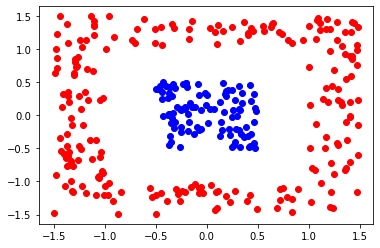

In [54]:
# Visualisation des données génerés par generateData3
A, B = generateData3(100)
X = A[:, 0]
Y = A[:, 1]
pl.scatter(X[B==1],Y[B==1],color="red")
pl.scatter(X[B==-1],Y[B==-1],color="blue")
pl.show()


In [61]:
# Prolongement pour avoir une courbe polynomiale
def transformationEchan(X,Y):
    M = np.zeros((len(X), 6))
    for i in range(len(X)):
        M[i][0] = 1
        M[i][1] = X[i]
        M[i][2] = Y[i]
        M[i][3] = X[i]**2
        M[i][4] = X[i]*Y[i]
        M[i][5] = Y[i]**2
    return M

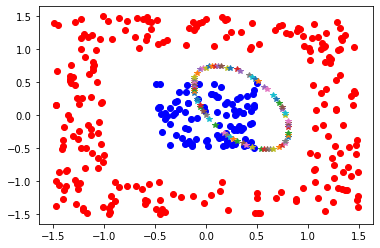

In [116]:
# Suite à cette transformation, on peut directement apprendre
# l’échantillon avec le perceptron sans changement sur le perceptron 
# car la concaténation de l’echantillon avec une colonne
# de 1 (qui permet d’ajouter une coordonnée) est déja effectuée
# par le plongement qui crée une colonne de 1 dans la matrice.
# for i in range(0, 10):
(A,B) = generateData3(100)
X = A[:,0]
Y = A[:,1]
pl.scatter(X[B==1],Y[B==1],color="red")
pl.scatter(X[B==-1],Y[B==-1],color="blue")
M = transformationEchan(X,Y)
w = perceptron(M,B)
# print(w)
def f(w, x ,y):
    val = np.array([1, x, y, x**2, x*y, y**2])
    return np.dot(w, val)
res = 100
for x in range(res):
    for y in range(res):
        # print(f(w,-3/2+3*x/res,-3/2+3*y/res))
        if abs(f(w,-3/2+3*x/res,-3/2+3*y/res)) < 0.01:
            pl.plot(-3/2+3*x/res,-3/2+3*y/res, "*")


In [118]:

# my_list = ['apple', 'banana', 'grapes', 'pear']
# for counter, value in enumerate(my_list):
#     print counter, value
# Output:
# 0 apple
# 1 banana
# 2 grapes
# 3 pear

#        ___
#        \
# f(x) = /__ ci yi k(xi, x)

#  (support_set = {(xi, yi) tq ci != 0}), une fonction noyau k 

def f_from_k(coeffs, support_set, k, x):
	s = 0
	for i, val in enumerate(support_set):
		xi = val[0]
		yi = val[1]
		s = s + coeffs[i] * yi * k(xi, x)
	return s



In [119]:
def perceptron_k(X,Y,k):
    coeff = []
    support_set = []
    compteur = 1
    limite = 0
   
    while(compteur != 0 and limite <= 10000 ):
        compteur = 0
        for i in range(len(X)):
              if(Y[i] * f_from_k(coeff,support_set,k,X[i])) <=0:
                compteur = 1
                trouve = False
                findI = 0
                for j,val in enumerate(support_set):
                    xi = val[0]
                    if( np.array_equal(xi,X[j]) ):
                        trouvé = True
                        findI = j
                        break
                if trouve is True:
                    coeff[findI]+=1
                else:
                    support_set.append((X[i],Y[i]))
                    coeff.append(1)
                    
        limite += 1

    return coeff, support_set

In [120]:
def fonctionNoyau(e1, e2):
    x1 = e1[0]
    y1 = e1[1]
    x2 = e2[0]
    y2 = e2[1]
    
    y = 1 + x1*x2 + y1*y2 + ((x1**2)*(x2**2)) + x1*y1*x2*y2 + ((y1**2)*(y2**2))
    return np.float64(y)

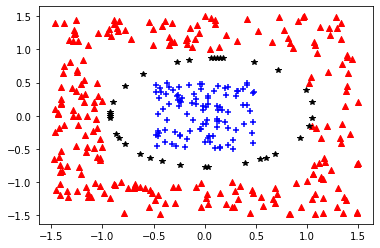

In [121]:
(A,B) = generateData3(100)
X = A[:,0]
Y = A[:,1]
pl.scatter(X[B==1],Y[B==1],color="red", marker="^")
pl.scatter(X[B==-1],Y[B==-1],color="blue" , marker="+")

(coeff, support_set) = perceptron_k(A,B, fonctionNoyau)

for x in range(res):
        for y in range(res):
            X=[-3/2+3*x/res,-3/2+3*y/res]
            if abs(f_from_k(coeff,support_set,fonctionNoyau, X))<0.01:
                pl.plot(-3/2+3*x/res,-3/2+3*y/res,color='black',marker='*')
pl.show()

In [129]:
# Appliquez un noyau Gaussien aux donn´ees pr´ec´edentes
from math import exp
def kg1(x,y):
    sigma = 20
    return exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def kg2(x,y):
    sigma = 10
    return exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def kg3(x,y):
    sigma = 1
    return exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def kg4(x,y):
    sigma = 0.5
    return exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def kg5(x,y):
    sigma = 0.2
    return exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def experience(laFonctionNoyau):
    (A,B) = generateData3(100)
    X = A[:,0]
    Y = A[:,1]
    pl.scatter(X[B==1],Y[B==1],color="red", marker="^")
    pl.scatter(X[B==-1],Y[B==-1],color="blue" , marker="+")

    (coeff, support_set) = perceptron_k(A,B, laFonctionNoyau)

    for x in range(res):
            for y in range(res):
                X=[-3/2+3*x/res,-3/2+3*y/res]
                if abs(f_from_k(coeff,support_set,laFonctionNoyau, X))<0.01:
                    pl.plot(-3/2+3*x/res,-3/2+3*y/res,color='black',marker='*')
    pl.show()

# experience(kg1) # 20

In [131]:
# experience(kg2) # 10

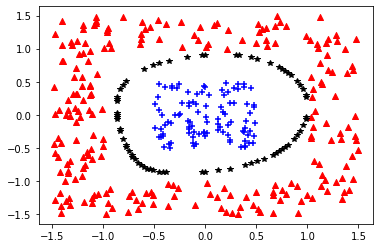

In [126]:
experience(kg3) # 1

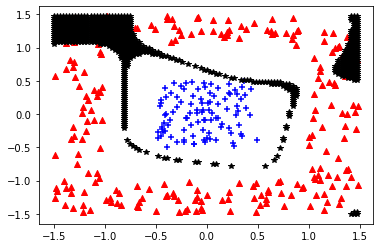

In [127]:
experience(kg4) # 0.5

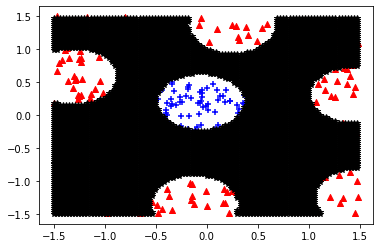

In [128]:
experience(kg5) # 0.2

In [ ]:
# On remarque ici pour sigma (0.2,0.5,1,3,5,8).
#   Sigma 0.2 et 0.5 n’arrive pas a faire une bonne prédiction et se base trop sur la courbe.
#   Sigma > 8 les temps de calculs deviennent trop long, pour un résultat comparable à sigma
#       compris entre 1 et 5.